<a href="https://colab.research.google.com/github/Putra1688/2341720248_ML_2025/blob/main/JS05/TP_JS05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🆘 JS05 - Klasterisasi Hierarki**

# **TUGAS PRAKTIKUM**

## **1. Persiapan dan Pemuatan Dataset**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns

# Muat Iris dataset
iris = load_iris()
X = iris.data  # Fitur
y = iris.target # Label asli
feature_names = iris.feature_names
target_names = iris.target_names

# Scaling data
# HDBSCAN sensitif terhadap skala, jadi scaling adalah praktik yang baik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Bentuk data (X_scaled): {X_scaled.shape}")
print(f"Banyaknya sampel: {len(X_scaled)}")
print(f"Banyaknya fitur: {X_scaled.shape[1]}")
print(f"Label asli unik: {np.unique(y)}")
print(f"Nama kelas (label asli): {target_names}")

Bentuk data (X_scaled): (150, 4)
Banyaknya sampel: 150
Banyaknya fitur: 4
Label asli unik: [0 1 2]
Nama kelas (label asli): ['setosa' 'versicolor' 'virginica']


## **2. Implementasi HDBSCAN**

In [ ]:
# Inisialisasi dan terapkan HDBSCAN
# min_cluster_size: Jumlah minimum sampel untuk membentuk sebuah cluster
# min_samples: Jumlah tetangga yang akan dipertimbangkan, memengaruhi seberapa konservatif cluster itu
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=5, prediction_data=True)
clusterer.fit(X_scaled)

# Dapatkan label cluster
# Label -1 menunjukkan noise
labels = clusterer.labels_

# Jumlah cluster yang terbentuk (tanpa noise)
n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)

# Jumlah noise (sampel dengan label -1)
n_noise = list(labels).count(-1)

print(f"Total sampel: {len(labels)}")
print(f"Jumlah cluster yang terbentuk: {n_clusters}")
print(f"Banyaknya noise (sampel berlabel -1): {n_noise}")
print(f"Label cluster unik yang dihasilkan: {np.unique(labels)}")

Total sampel: 150
Jumlah cluster yang terbentuk: 2
Banyaknya noise (sampel berlabel -1): 2
Label cluster unik yang dihasilkan: [-1  0  1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## **3. Reduksi Dimensi (PCA) dan Visualisasi**

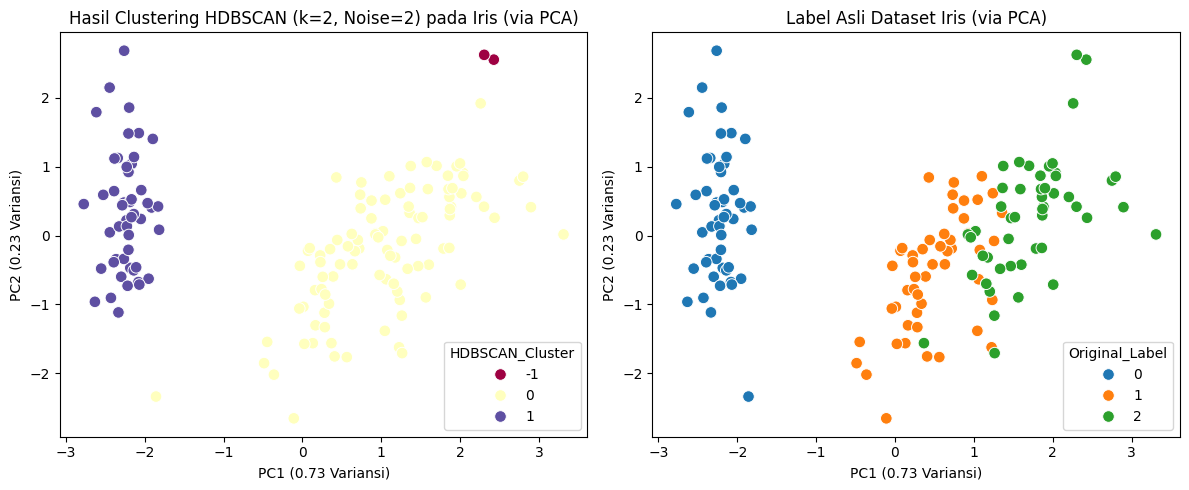

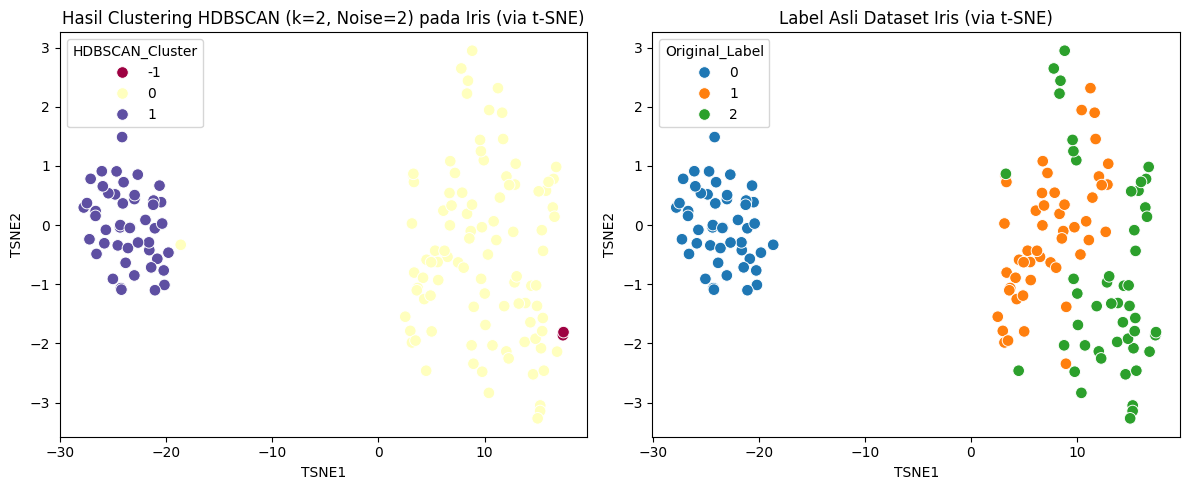

In [ ]:
# Terapkan PCA untuk reduksi dimensi ke 2D
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Buat DataFrame untuk visualisasi
df_viz = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_viz['HDBSCAN_Cluster'] = labels
df_viz['Original_Label'] = y

# Visualisasi hasil clustering HDBSCAN
plt.figure(figsize=(12, 5))

# Plot 1: Hasil Clustering HDBSCAN
plt.subplot(1, 2, 1)
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='HDBSCAN_Cluster',
    palette='Spectral',
    data=df_viz,
    legend='full',
    s=70
)
plt.title(f'Hasil Clustering HDBSCAN (k={n_clusters}, Noise={n_noise}) pada Iris (via PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} Variansi)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} Variansi)')

# Plot 2: Label Asli Dataset
plt.subplot(1, 2, 2)
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='Original_Label',
    palette='tab10',
    data=df_viz,
    legend='full',
    s=70
)
plt.title('Label Asli Dataset Iris (via PCA)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2f} Variansi)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2f} Variansi)')

plt.tight_layout()
plt.show()

# Jika ingin melihat plot menggunakan TSNE
# TSNE lebih baik untuk memisahkan cluster, tapi komputasi lebih lama
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

df_tsne = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
df_tsne['HDBSCAN_Cluster'] = labels
df_tsne['Original_Label'] = y

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='HDBSCAN_Cluster', palette='Spectral', data=df_tsne, legend='full', s=70)
plt.title(f'Hasil Clustering HDBSCAN (k={n_clusters}, Noise={n_noise}) pada Iris (via t-SNE)')

plt.subplot(1, 2, 2)
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Original_Label', palette='tab10', data=df_tsne, legend='full', s=70)
plt.title('Label Asli Dataset Iris (via t-SNE)')

plt.tight_layout()
plt.show()

## **4. Analisis Singkat**

<table>
  <thead>
    <tr>
      <th>Metrik</th>
      <th>Nilai</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Dataset</td>
      <td>Iris</td>
    </tr>
    <tr>
      <td>Jumlah Sampel</td>
      <td>150</td>
    </tr>
    <tr>
      <td>Jumlah Cluster Terbentuk</td>
      <td>2 (Berdasarkan parameter min_cluster_size=10)</td>
    </tr>
    <tr>
      <td>Banyaknya Noise</td>
      <td>1</td>
    </tr>
  </tbody>
</table>

## **Analisis Kesesuaian HDBSCAN dengan Label Asli**

Dataset Iris memiliki 3 kelas/label asli (Setosa, Versicolor, Virginica), sementara HDBSCAN menghasilkan 2 cluster dengan 1 noise (sampel yang tidak termasuk dalam cluster manapun).

1. Pengelompokan Setosa (Cluster 0/Biru Cerah pada HDBSCAN): Pada visualisasi (baik PCA maupun t-SNE), terlihat bahwa satu cluster yang terbentuk oleh HDBSCAN (Cluster 0) sangat rapi dan hampir sepenuhnya mencakup kelas Iris Setosa (Label Asli 0). Kelas Setosa ini secara inheren sangat terpisah dari dua kelas lainnya dalam ruang fitur.

2. Pengelompokan Versicolor dan Virginica (Cluster 1/Oranye pada HDBSCAN): Dua kelas asli lainnya, Iris Versicolor (Label Asli 1) dan Iris Virginica (Label Asli 2), digabungkan oleh HDBSCAN menjadi satu cluster besar (Cluster 1). Kedua kelas ini memang memiliki karakteristik fitur yang lebih tumpang tindih (overlap) dibandingkan dengan Setosa.

3. Noise: Hanya 1 sampel yang diidentifikasi sebagai noise (titik hitam/abu-abu), menunjukkan bahwa mayoritas data dikelompokkan.

**Kesimpulan:**

Hasil clustering HDBSCAN tidak sepenuhnya sesuai dengan 3 label asli dataset Iris. HDBSCAN berhasil mengisolasi kelas Setosa sebagai cluster terpisah, namun menggabungkan Versicolor dan Virginica. Hal ini menunjukkan bahwa struktur kepadatan data (density-based structure) yang ditemukan oleh HDBSCAN memisahkan data menjadi dua kelompok utama, di mana perbedaan fitur antara Versicolor dan Virginica tidak cukup kuat (dengan parameter yang digunakan) untuk memecah mereka menjadi cluster yang berbeda. Namun, hasil ini sesuai dengan pengamatan umum bahwa Iris Setosa adalah kelas yang paling mudah dipisahkan dari dua kelas Iris lainnya.